In [1]:
# Import General Dependancies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

#Import tensorflow dependencies - Functional API

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [2]:


# Avoid out of memory error OOM by setting gpu memory consumptions growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:

#Create Folder Structures
# set up Paths
POS_Path = os.path.join('data','positive')
NEG_path = os.path.join('data','negative')
ANC_path = os.path.join('data','anchor')

#Make directories

#os.makedirs(POS_Path)
#os.makedirs(NEG_path)
#os.makedirs(ANC_path)



In [ ]:
#Move LFW Data into Negative folder (to the following repository data/Negative)
for item in os.listdir('lfw'):
    item_path = os.path.join('lfw', item)

    # Check if the current item is a directory
    if os.path.isdir(item_path):
        for file in os.listdir(item_path):
            file_path = os.path.join(item_path, file)
            
            # Check if the current item is a file
            if os.path.isfile(file_path):
                new_path = os.path.join(NEG_path, file)
                os.replace(file_path, new_path)


In [4]:
#Import uuid library to generate Unique image names (universally unique identifiers)
import uuid

In [5]:
os.path.join(ANC_path, '{}.jpg'.format(uuid.uuid1()))

'data/anchor/a0ffd8e6-c2c4-11ee-b8b9-c6b9400a02e6.jpg'

In [7]:
import cv2
#Collect Positive and Anchor classes

#Establish a connection to the webcam
cap = cv2.VideoCapture(1)
#Loop whenever camera is open
while cap.isOpened:
    ret, frame =cap.read()
    # Check if the frame is successfully captured
    if not ret:
        print("Error: Couldn't capture frame. Exiting...")
        break
    #Indexing and Slicing pixels for webcam (cut down frame to 250x250) (y axis, x-axis)
    frame = frame[250:550, 450:650+250, :]

    #Collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        #Create unique file path
        imgname = os.path.join(ANC_path,'{}.jpg'.format(uuid.uuid1()))
        #Write out anchor image {cv2.imwrite is a function provided by the OpenCV library in Python for saving images to disk}
        cv2.imwrite(imgname,frame)

    #Collect Positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        #Create unique file path
        imgname = os.path.join(POS_Path,'{}.jpg'.format(uuid.uuid1()))
        #Write out positive image {cv2.imwrite is a function provided by the OpenCV library in Python for saving images to disk}
        cv2.imwrite(imgname,frame)

    #show image back to screen
    cv2.imshow('Image Collection', frame)

#Breaking gracefully
# press q to break
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

#Release Webcam
cap.release()
#Close the image frame
cv2.destroyAllWindows()

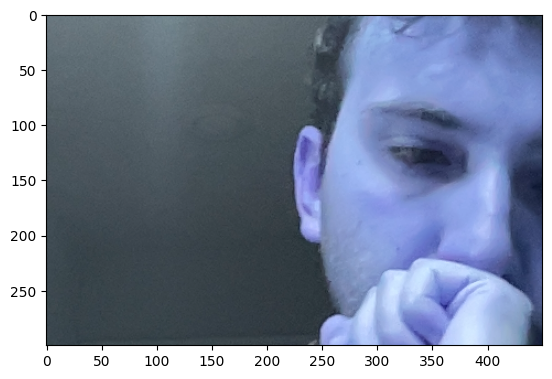

In [8]:
plt.imshow(frame)

DATA AUGMENTATION

In [30]:
def data_aug(img):
    data = []
    count=0
    for i in range(9):
        
        print(f"Augmenting image {count + 1}")
        img =tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        print(f"Image after brightness: {img.shape}")
        img =tf.image.stateless_random_contrast(img, lower =0.6, upper =1, seed=(1,3))
        print(f"Image after contrast: {img.shape}")
        img =tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        print(f"Image after flip: {img.shape}")
        img =tf.image.stateless_random_jpeg_quality(img,min_jpeg_quality=90,max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        print(f"Image after quality: {img.shape}")
        img =tf.image.stateless_random_saturation(img, lower=0.9,upper=1,seed=(np.random.randint(100),np.random.randint(100)))
        print(f"Image after saturation: {img.shape}")
        count = i+1

        data.append(img)
    
    return data

In [ ]:
#Loop through ANC and POS path to get more examplesfor testing
for file_name in os.listdir(os.path.join(POS_Path)):
    img_path = os.path.join(POS_Path, file_name)
    img = cv2.imread(img_path)
    augmented_images= data_aug(img)
    
    
    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_Path, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [32]:
import os

file_list = os.listdir(ANC_path)
jpg_files = [file for file in file_list if file.endswith('.jpg')]

print(jpg_files)


['51a38a82-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '2c2dddaa-9ac5-11ee-80ee-c6b9400a02e5.jpg', '526d5d8a-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '65c16dae-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '48032b0e-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '467c1bf6-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '463f2732-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '5ed583b8-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '510ce7d0-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '461bdf2a-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '48991c9a-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '5b66834e-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '45680ae0-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '50109886-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '5ba93122-c2c7-11ee-b8b9-c6b9400a02e6.jpg', '5ef38142-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '63fd8034-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '4ff38a5c-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '5ed5be28-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '61b2cc44-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '4ee3f052-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '51481526-c2c8-11ee-b8b9-c6b9400a02e6.jpg', '4b0b1c4e-c2c8-11ee-b8b9-c6b940

In [33]:
#Get image Directories variable = go grab all files in given directory that end with jpg up to 300

anchor = tf.data.Dataset.list_files(ANC_path+'/*.jpg').take(3000)
positive = tf.data.Dataset.list_files(POS_Path+'/*.jpg').take(3000)
negative = tf.data.Dataset.list_files(NEG_path+'/*.jpg').take(3000)

In [35]:
dir_test = anchor.as_numpy_iterator()
print(dir_test.next())

b'data/anchor/5e53b7fc-c2c8-11ee-b8b9-c6b9400a02e6.jpg'


In [36]:
def preprocess(file_path):
    try:
        byte_img = tf.io.read_file(file_path)
        img = tf.io.decode_jpeg(byte_img)
        img = tf.image.resize(img, (100,100))
        img = img / 255.0
        return img
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None


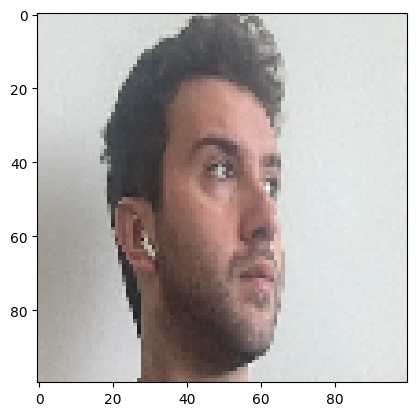

In [37]:
img = preprocess('data/anchor/c916b38a-b875-11ee-af0c-c6b9400a02e6.jpg')
plt.imshow(img)

In [38]:
img.numpy().max() 

1.0

In [39]:
#Create a Labelled Dataset
# what we want to do:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [40]:
samples = data.as_numpy_iterator()
exampple = samples.next()
exampple

(b'data/anchor/46530784-c2c8-11ee-b8b9-c6b9400a02e6.jpg',
 b'data/positive/18dc6060-c2c9-11ee-b8b9-c6b9400a02e6.jpg',
 1.0)

In [41]:
#Build Train and Test Partition
def preprocess_twin (input_img, validation_img, label):
    return(preprocess(input_img),preprocess(validation_img),label)


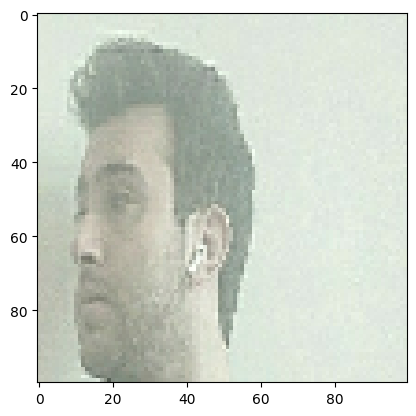

In [42]:
res = preprocess_twin(*exampple)
plt.imshow(res[1])

In [16]:
res[2]

1.0

In [43]:
#Build Dataloader Pipeline
data = data.map(preprocess_twin)
data = data.cache()
#positive imgs and Negative imgs are mixed up
data = data.shuffle(buffer_size=10000)

In [44]:
#Training Partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
#To prevent bottleneck
train_data = train_data.prefetch(8)

In [45]:
# Testing Partition
test_data = data.skip(round(len(data)* .7))
test_data = test_data.take(round(len(data)* .3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

Model Engineering

Build Embeding Layer

In [46]:
def make_embedding():
    inp = Input(shape=(100,100,3), name= 'input_image')

    #First Block
    #Creating Convolution layer
    c1 = Conv2D(64,(10,10), activation = 'relu')(inp)
    m1 = MaxPooling2D(64,(2,2), padding ='same')(c1)

    #Second Block
    c2 = Conv2D(128,(7,7), activation = 'relu')(m1)
    m2 = MaxPooling2D(64,(2,2), padding ='same')(c2)

    #Third Block
    c3 = Conv2D(128,(4,4), activation = 'relu')(m2)
    m3 = MaxPooling2D(64,(2,2), padding ='same')(c3)

    #Final Embedding Block
    c4 = Conv2D(256,(4,4), activation = 'relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation = 'sigmoid')(f1)

    return Model(inputs=[inp],outputs=[d1],name='embedding')



In [47]:
embedding = make_embedding()

In [48]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

Build Distance Layer

In [49]:
#Creating Siamese L1 Distance class
#This helps create a custom Neural Layer
class L1Dist(Layer):

    #Init method defines inheritance
    def __init__(self, **kwargs):
        super().__init__()

    #Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)


In [50]:
l1 = L1Dist()

In [66]:
l1

Make Siamese Model

In [51]:
input_image = Input(name='input_img',shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [52]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [53]:
siamese_layer = L1Dist()

In [54]:
distances = siamese_layer(inp_embedding, val_embedding)

In [55]:
classifier = Dense(1, activation='sigmoid')(distances) 

In [72]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_4')>

In [56]:
siamese_network = Model(inputs=[input_image,validation_image],outputs=classifier, name='SiameseNetwork')

In [57]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [58]:
def make_siamese_model():

    #Anchor image input in network
    input_image = Input(name='input_img',shape=(100,100,3))

    #Validation image in network
    validation_image = Input(name='validation_img', shape=(100,100,3))

    #Combine Siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image),embedding(validation_image))

    #Classification Layer
    classifier = Dense(1, activation='sigmoid')(distances) 

    return Model(inputs=[input_image,validation_image],outputs=classifier, name='SiameseNetwork')

In [59]:
siamese_model = make_siamese_model()

In [256]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

Training

Setup Loss Optimizer

In [60]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [61]:
opt =tf.keras.optimizers.Adam(1e-4) #0.0001

Establish Checkpoints

In [62]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir,'ckpt')
checkpoint = tf.train.Checkpoint(opt = opt, siamese_model=siamese_model)

In [63]:
test_batch = train_data.as_numpy_iterator()
batch_1 = test_batch.next()
X = batch_1[:2]
y = batch_1[2]
y

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.],
      dtype=float32)

Build Train Setup Function

In [64]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

Build Training Loop

In [65]:
from tensorflow.keras.metrics import Precision,Recall

In [66]:
#While train_step function focuses on one batch the train function here will loop through each batch in the dataset
def train (data, EPOCHS):
    #Loop through epochs epoch refers to one complete pass through the entire training dataset during the training phase
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch,EPOCHS))
        progbar =tf.keras.utils.Progbar(len(data))

        #Creating a metric object

        r = Recall()
        p = Precision()

    #Loop through each batch
        for idx, batch in enumerate(data):
        
            #Run Train step here
            loss = train_step(batch)
            y_hat= siamese_model.predict(batch[:2])
            r.update_state(batch[2],y_hat)
            p.update_state(batch[2],y_hat)
            progbar.update(idx+1)
        print(loss.numpy(),r.result().numpy() ,p.result().numpy())
    
    #Save Checkpoint
    if epoch %10 == 0:
        checkpoint.save(file_prefix=checkpoint_prefix)

Train Model

In [67]:
EPOCHS = 50

In [68]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
263/263 [==============================] - 1061s 4s/step
0.047776043 0.946102 0.99343103

 Epoch 2/50
263/263 [==============================] - 1199s 5s/step
0.001495777 0.9900568 0.99382126

 Epoch 3/50
263/263 [==============================] - 1027s 4s/step
0.0024016844 0.99146515 0.99382126

 Epoch 4/50
263/263 [==============================] - 1490s 6s/step
9.082537e-05 0.9976099 0.99665713

 Epoch 5/50
263/263 [==============================] - 1634s 6s/step
0.053563617 0.9951761 0.9956564

 Epoch 6/50
263/263 [==============================] - 1091s 4s/step
0.0064732847 0.9995252 0.9990508

 Epoch 7/50
263/263 [==============================] - 1100s 4s/step
0.10862562 0.9934211 0.99576074

 Epoch 8/50
 96/263 [=========>....................] - ETA: 11:38

KeyboardInterrupt: 

Evaluate Model

Import Metrics

In [69]:
#Import metrics calculation
from tensorflow.keras.metrics import Precision, Recall

Make Predictions

In [70]:
#Get batch of test data
test_input, test_val, y_true =test_data.as_numpy_iterator().next()

In [71]:
#Make predictions
y_hat = siamese_model([test_input, test_val])


In [72]:
#Post processing Results
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]

In [73]:
y_true

array([0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

Calculate metrics

In [74]:
#Creating a metric object
m = Precision()

#Updating state Calculating recall value
m.update_state(y_true,y_hat)

#Return Result
m.result().numpy()

1.0

In [75]:
#Creating a metric object
m = Recall()

#Updating state Calculating recall value
m.update_state(y_true,y_hat)

#Return Result
m.result().numpy()

1.0

In [76]:
r=Recall()
p= Precision()
for test_input,test_val,y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input,test_val])
    r.update_state(y_true,yhat)
    p.update_state(y_true,yhat)

print(r.result().numpy(),p.result().numpy())

1/1 [==============================] - 0s 404ms/step
0.9798432 0.99885845


Visualize Results

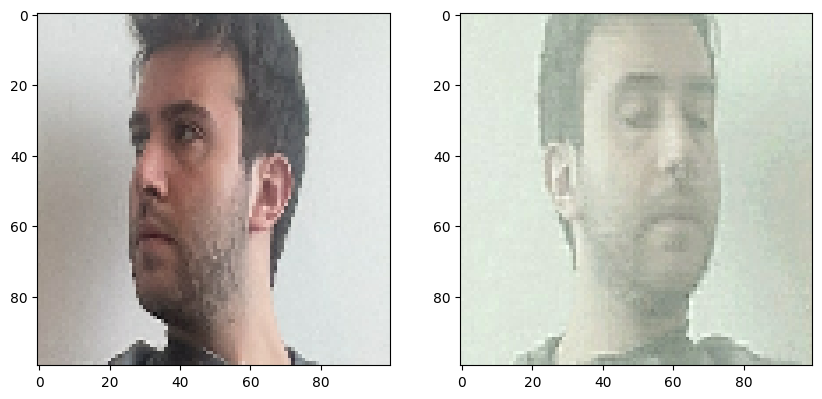

In [77]:
#Set plot size
plt.figure(figsize=(10,8))

#Set 1st suplot
plt.subplot(1,2,1)
plt.imshow(test_input[1])

#Set Second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[1])
plt.show()


Save Model

In [78]:
#save weights
siamese_model.save('siamesemodelv2.h5')

/Users/charbelbaaklini/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
#Reload Model
with tf.keras.utils.custom_object_scope({'L1Dist': L1Dist}):
    model = tf.keras.models.load_model('siamesemodelv2.h5', custom_objects={'LDist': L1Dist,
                                                                      'BinaryCrossentropy': tf.losses.BinaryCrossentropy})

In [80]:
#Make predictions with reloaded model
model.predict([test_input,test_val])

1/1 [==============================] - 1s 519ms/step


array([[9.9999940e-01],
       [9.4695490e-05],
       [7.3316717e-01],
       [9.6349645e-01],
       [1.0000000e+00],
       [8.5649347e-01],
       [1.2250288e-06],
       [2.0823781e-04]], dtype=float32)

In [81]:
#View Model summary
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

Real Time Test

Define Verification Function

In [52]:
os.listdir(os.path.join('application_data','verification_images'))

['6d8a7c36-b875-11ee-af0c-c6b9400a02e6.jpg',
 '77d40f18-b875-11ee-af0c-c6b9400a02e6.jpg',
 'fb33b94e-b875-11ee-af0c-c6b9400a02e6.jpg',
 '67cd05ca-b875-11ee-af0c-c6b9400a02e6.jpg',
 '0554975e-b876-11ee-af0c-c6b9400a02e6.jpg',
 '22443482-b876-11ee-af0c-c6b9400a02e6.jpg',
 '3537d324-b875-11ee-af0c-c6b9400a02e6.jpg',
 '503a4936-b875-11ee-af0c-c6b9400a02e6.jpg',
 'ead6184e-9ac5-11ee-80ee-c6b9400a02e5.jpg',
 'e5a77156-b875-11ee-af0c-c6b9400a02e6.jpg',
 '85276214-b875-11ee-af0c-c6b9400a02e6.jpg',
 'ec68f6d0-a9b2-11ee-80ee-c6b9400a02e5.jpg',
 'e59cef56-9ac5-11ee-80ee-c6b9400a02e5.jpg',
 '27ed3320-b876-11ee-af0c-c6b9400a02e6.jpg',
 '35c0e9de-b875-11ee-af0c-c6b9400a02e6.jpg',
 '9ce31b00-b875-11ee-af0c-c6b9400a02e6.jpg',
 'e1625188-b875-11ee-af0c-c6b9400a02e6.jpg',
 'e6aab522-b875-11ee-af0c-c6b9400a02e6.jpg',
 'a0d6d706-b875-11ee-af0c-c6b9400a02e6.jpg',
 'a961046e-b875-11ee-af0c-c6b9400a02e6.jpg',
 'f014968c-b875-11ee-af0c-c6b9400a02e6.jpg',
 '253edca0-b876-11ee-af0c-c6b9400a02e6.jpg',
 '437f4eda

In [53]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data/input_image/input_image.jpg'

In [82]:
for image in os.listdir(os.path.join('application_data','verification_images')):
    validation_img = os.path.join('application_data','verification_images',image)
    print(validation_img)

application_data/verification_images/6d8a7c36-b875-11ee-af0c-c6b9400a02e6.jpg
application_data/verification_images/77d40f18-b875-11ee-af0c-c6b9400a02e6.jpg
application_data/verification_images/fb33b94e-b875-11ee-af0c-c6b9400a02e6.jpg
application_data/verification_images/67cd05ca-b875-11ee-af0c-c6b9400a02e6.jpg
application_data/verification_images/0554975e-b876-11ee-af0c-c6b9400a02e6.jpg
application_data/verification_images/22443482-b876-11ee-af0c-c6b9400a02e6.jpg
application_data/verification_images/3537d324-b875-11ee-af0c-c6b9400a02e6.jpg
application_data/verification_images/503a4936-b875-11ee-af0c-c6b9400a02e6.jpg
application_data/verification_images/ead6184e-9ac5-11ee-80ee-c6b9400a02e5.jpg
application_data/verification_images/e5a77156-b875-11ee-af0c-c6b9400a02e6.jpg
application_data/verification_images/85276214-b875-11ee-af0c-c6b9400a02e6.jpg
application_data/verification_images/ec68f6d0-a9b2-11ee-80ee-c6b9400a02e5.jpg
application_data/verification_images/e59cef56-9ac5-11ee-80ee-c6b

In [83]:
def verify(model, detection_threshold, verification_threshold):
    results = []
    verification_images_path = os.path.join('application_data', 'verification_images')
    positive_detections = 0  # Initialize a counter for positive detections

    for image in os.listdir(verification_images_path):
        if not is_image_file(image):
            continue  # Skip this file if it's not an image
        
        input_img_path = os.path.join('application_data', 'input_image', 'input_image.jpg')
        validation_img_path = os.path.join(verification_images_path, image)
        
        input_img = preprocess(input_img_path)
        validation_img = preprocess(validation_img_path)
        
        # If preprocess returns None (in case of an error), skip this iteration
        if input_img is None or validation_img is None:
            print(f"Skipping image due to preprocessing error: {validation_img_path}")
            continue
        
        # Make Predictions 
        result = model.predict([np.expand_dims(input_img, axis=0), np.expand_dims(validation_img, axis=0)])
        results.append(result)
        
        # Detection Threshold: Metric above which a prediction is considered positive
        if result > detection_threshold:
            positive_detections += 1
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    total_images = len([image for image in os.listdir(verification_images_path) if is_image_file(image)])
    verification = positive_detections / total_images
    verified = verification > verification_threshold
    
    return results, verified


In [84]:
print(img.shape)


(100, 100, 3)


Open CV Real Time Verification

In [90]:
# Define the is_image_file function
def is_image_file(filename):
    valid_image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp"]
    return any(filename.lower().endswith(ext) for ext in valid_image_extensions)

cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[250:550, 450:650+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        
        # Filter and process the image files before verification
        folder_path = os.path.join('application_data', 'input_image')
        for filename in os.listdir(folder_path):
            if not is_image_file(filename):
                continue  # Skip this file if it's not an image
            file_path = os.path.join(folder_path, filename)
            # Now file_path will only be an image file, you can safely process it
            # ... (your processing code, if any, goes here) ...

        # Run verification
        results, verified = verify(model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 139ms/step
False
1/1 [==============================] - 0s 138ms/step
False
